## VARIABLE SELECTION AND PREDICTION TEST WITH VIX_Y = T+1 and others = T

In [1]:
import pandas as pd
import numpy as np

from pandas import read_excel

import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

from sklearn.model_selection import TimeSeriesSplit 

from matplotlib.patches import Patch
import matplotlib.pyplot as plt 

pd.set_option('Display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
from sklearn import preprocessing

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot as plt

In [7]:
import asgl # adaptive lasso

### ★ Loading Dataframe

In [8]:
df_raw = read_excel("./data_check.xlsx", index_col = 0)

# scaler = preprocessing.MinMaxScaler()
# prep = scaler.fit_transform(df_raw)
# df_final = pd.DataFrame(prep, columns = df_raw.columns)

In [9]:
df_raw.shape

(2198, 46)

In [10]:
df_raw.head(3)

,VIX_Y,VIX_D_X,VIX_W_X,VIX_M_X,dis,Score,google_1,google_2,google_3,google_4,google_5,google_6,^GSPC,CL=F,^DJI,MSCI,oil,DXY,credit,term,FF,Mkt-RF,SMB,HML,RF,ST_Rev,tbill,eur,cny,gbp,jpy,GSPC_TR,DJI_TR,MSCI_TR,GSPC_TR_Change,DJI_TR_Change,MSCI_TR_Change,inf_M,SentMichigan,m1,house,indus,orders,crb,capa_level,capa_change
2010-02-04,3.26232,3.26117,3.14441,3.03808,0.47378,0.07314,5,0,9,8,54,10,-0.00452,-0.01178,-0.00287,-0.00900,73.13000,94.14010,6.59000,3.53000,0.13321,-3.14000,-0.33000,-1.17000,0.00000,-0.62000,0.29000,-0.03244,0.00015,-0.02065,-0.00492,5.31485,2.75951,0.71836,0.26038,0.81908,-0.58001,-0.00081,-0.00965,0.01404,-0.00913,0.00391,-0.00179,-0.02557,71.07231,0.00593
2010-02-05,3.27752,3.26232,3.15616,3.05170,0.57929,0.16840,6,36,9,7,45,8,0.00042,-0.00630,0.00011,0.00203,71.15000,94.62180,6.81000,3.49000,0.13429,0.29000,-0.06000,0.01000,0.00000,0.68000,0.28000,-0.03458,-0.00004,-0.02017,0.00035,5.82318,2.78837,0.64618,0.05468,0.01025,0.32014,-0.00077,-0.00927,0.01376,-0.00670,0.00404,-0.00135,-0.01942,71.09571,0.00606
2010-02-12,3.10234,3.12369,3.21409,3.12003,0.43976,-0.12827,4,47,6,6,0,8,-0.00039,-0.00356,-0.00048,-0.00031,74.11000,93.99760,7.03000,3.59000,0.14179,-0.07000,0.97000,0.15000,0.00000,0.07000,0.34000,-0.00354,-0.00002,-0.00071,0.00045,3.71437,2.64704,0.71026,-0.04056,0.76670,-0.14991,-0.00045,-0.00656,0.01182,0.01031,0.00492,0.00178,-0.00667,71.25954,0.00697


In [11]:
# pd.DataFrame(scaler.inverse_transform(df_final), columns = df_raw.columns).head(3)

### ☆ Cross-Validation Example and Visualization

In [12]:
kfcv = KFold(n_splits=5, shuffle=False)
kfcv

KFold(n_splits=5, random_state=None, shuffle=False)

In [13]:
tscv = TimeSeriesSplit(n_splits = 5)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [14]:
X_example = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y_example = np.array([1, 2, 3, 4, 5, 6])

In [15]:
for train_index, test_index in kfcv.split(X_example):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_example[train_index], X_example[test_index]
    y_train, y_test = y_example[train_index], y_example[test_index]

TRAIN: [2 3 4 5] TEST: [0 1]
TRAIN: [0 1 3 4 5] TEST: [2]
TRAIN: [0 1 2 4 5] TEST: [3]
TRAIN: [0 1 2 3 5] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [16]:
for train_index, test_index in tscv.split(X_example):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_example[train_index], X_example[test_index]
    y_train, y_test = y_example[train_index], y_example[test_index]

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [17]:
# df_final.head(3)

### ★ Train & Test Split

In [18]:
""" Scaling MIN MAX Scaler """

X_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()

y = pd.DataFrame(df_raw.loc[:, 'VIX_Y'])
X = df_raw.loc[:, df_raw.columns != 'VIX_Y']

prep_y = y_scaler.fit_transform(y)
prep_X = X_scaler.fit_transform(X)

y = pd.DataFrame(prep_y, columns = [df_raw.columns[0]])
X = pd.DataFrame(prep_X, columns = df_raw.columns[1:])
# X = df_final.loc[:,~(df_final.columns.isin(['VIX_Y','VIX_D_X','VIX_W_X','VIX_M_X']))]


In [19]:
X_all = X.loc[:, X.columns != 'VIX_Y']
X_eco = X.loc[:, ~(X.columns.isin(['VIX_Y','Score','dis','google_1','google_2','google_3','google_4','google_5','google_6']))]
X_har = X.loc[:, X.columns.isin(['VIX_D_X','VIX_W_X','VIX_M_X'])]

In [20]:
""" Train Test Split for Time Series """

train_ind = int(len(y)*0.875)

X_all_train = X_all[:train_ind]
X_eco_train = X_eco[:train_ind]
X_har_train = X_har[:train_ind]
y_train = y[:train_ind]

X_all_test = X_all[train_ind:]
X_eco_test = X_eco[train_ind:]
X_har_test = X_har[train_ind:]
y_test = y[train_ind:]

In [195]:
X_all_train.iloc[:,0:3].tail()

,VIX_D_X,VIX_W_X,VIX_M_X
1918,0.04755,0.02324,0.02637
1919,0.04081,0.01761,0.02451
1920,0.08364,0.02508,0.02590
1921,0.13849,0.08034,0.03558
1922,0.14319,0.10157,0.04193


In [193]:
X_eco_train.iloc[:,0:3].head()

,VIX_D_X,VIX_W_X,VIX_M_X
0,0.63219,0.60666,0.56351
1,0.63288,0.61452,0.57368
2,0.54929,0.65329,0.62469
3,0.53642,0.62984,0.63217
4,0.52189,0.60577,0.63925


In [22]:
y_train.shape, y_test.shape

((1923, 1), (275, 1))

### CV using Pipeline

In [23]:
""" LASSO """
pipeline = Pipeline([('model', Lasso())])

# """ LASSO """
# pipeline = Pipeline([('scaler', StandardScaler()),('model', Lasso())])

#### ★ K-Fold CV

In [24]:
kfcv = KFold(n_splits=5, shuffle=False)
kfcv

KFold(n_splits=5, random_state=None, shuffle=False)

In [25]:
search_kfcv = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.001,2,0.1)},
                      cv = kfcv, scoring="neg_mean_squared_error",verbose=0
                      )

search_kfcv.fit(X_all_train, y_train)
search_kfcv.best_params_

# search_kfcv.best_score_

{'model__alpha': 0.001}

<Figure size 720x720 with 0 Axes>

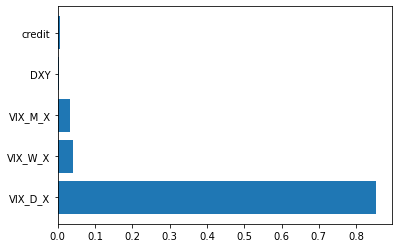

<Figure size 720x720 with 0 Axes>

In [26]:
coefficients = search_kfcv.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

plt.barh(X_all_train.columns[importance > 0], importance[importance>0], align='center')
plt.figure(figsize=(10,10))

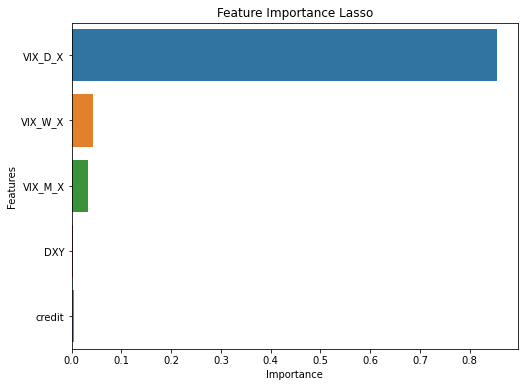

In [27]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x=importance[importance>0] , y=X_all_train.columns[importance > 0])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance Lasso")
plt.show()

#### ★ Time Series CV

In [28]:
search_tscv = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.001,2,0.1)},
                      cv = tscv, scoring="neg_mean_squared_error",verbose=0
                      )

search_tscv.fit(X_all_train, y_train)
search_tscv.best_params_

# search_tscv.best_score_

{'model__alpha': 0.001}

<Figure size 720x720 with 0 Axes>

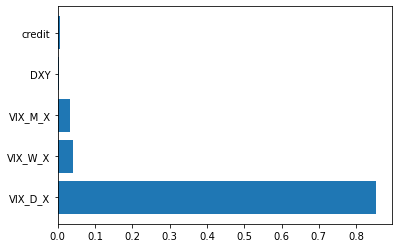

<Figure size 720x720 with 0 Axes>

In [179]:
coefficients = search_tscv.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

plt.barh(X_all_train.columns[importance > 0], importance[importance>0], align='center')
plt.figure(figsize=(10,10))

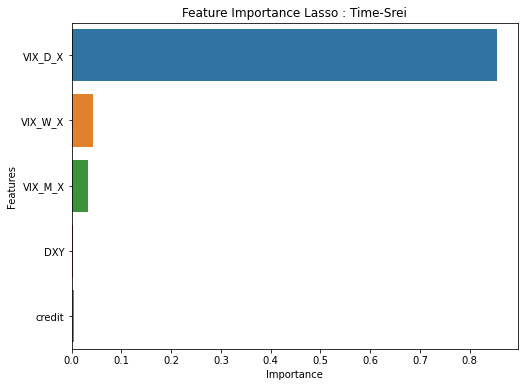

In [30]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x=importance[importance>0] , y=X_all_train.columns[importance > 0])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance Lasso : Time-Srei")
plt.show()

#### ★ Block Time Series CV

In [31]:
class BlockingTimeSeriesSplit():
    
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)
    
        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.7 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

### ★ Lasso Regression

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import numpy as np

In [217]:
X_all_train = round(X_all_train, 4)
y_train = round(y_train, 4)

In [222]:
X_all_train

,VIX_D_X,VIX_W_X,VIX_M_X,dis,Score,google_1,google_2,google_3,google_4,google_5,google_6,^GSPC,CL=F,^DJI,MSCI,oil,DXY,credit,term,FF,Mkt-RF,SMB,HML,RF,ST_Rev,tbill,eur,cny,gbp,jpy,GSPC_TR,DJI_TR,MSCI_TR,GSPC_TR_Change,DJI_TR_Change,MSCI_TR_Change,inf_M,SentMichigan,m1,house,indus,orders,crb,capa_level,capa_change
0,0.63220,0.60670,0.56350,0.44840,0.32210,0.03060,0.00000,0.09000,0.09520,0.54000,0.10000,0.31900,0.21950,0.29520,0.62020,0.53830,0.25680,0.57740,0.91450,0.02870,0.31840,0.29540,0.16510,0.00000,0.43520,0.08530,0.39990,0.40640,0.65230,0.17360,0.56720,0.66930,0.06780,0.70060,0.23540,0.45340,0.45290,0.53780,0.38670,0.45710,0.58580,0.51160,0.24750,0.00000,0.61220
1,0.63290,0.61450,0.57370,0.61110,0.39590,0.04080,0.36000,0.09000,0.07940,0.45000,0.08000,0.62130,0.30990,0.56630,0.70520,0.51560,0.27110,0.61450,0.90310,0.02920,0.60350,0.34340,0.43950,0.00000,0.62890,0.08140,0.39770,0.39480,0.65400,0.52770,0.62720,0.67650,0.06060,0.69900,0.23320,0.45850,0.45670,0.53940,0.38290,0.46300,0.59140,0.51250,0.31260,0.00250,0.61750
2,0.54930,0.65330,0.62470,0.39600,0.16620,0.02040,0.47000,0.06000,0.06350,0.00000,0.08000,0.57170,0.35500,0.51240,0.68710,0.54950,0.25260,0.65150,0.93160,0.03260,0.57360,0.52670,0.47210,0.00000,0.53800,0.10470,0.42970,0.39620,0.72160,0.53420,0.37820,0.64140,0.06700,0.69830,0.23520,0.45580,0.48330,0.55080,0.35580,0.50430,0.63070,0.51900,0.44750,0.02030,0.65470
3,0.53640,0.62980,0.63220,0.39350,0.42510,0.02040,0.30000,0.04000,0.04760,0.15000,0.07000,0.75240,0.55950,0.72100,0.72230,0.58250,0.23730,0.64980,0.92310,0.03460,0.72490,0.32920,0.67210,0.00000,0.64080,0.10080,0.46180,0.39710,0.75510,0.58040,0.36220,0.49570,0.01830,0.69840,0.23250,0.47620,0.49840,0.55720,0.34030,0.52780,0.65310,0.52280,0.78860,0.03040,0.67590
4,0.52190,0.60580,0.63930,0.31330,0.27310,0.02040,0.00000,0.06000,0.06350,0.20000,0.09000,0.63290,0.42940,0.59510,0.64970,0.58580,0.24430,0.61280,0.94590,0.03510,0.62010,0.38080,0.46510,0.00000,0.56040,0.10470,0.40520,0.39710,0.71040,0.55860,0.37860,0.40300,0.05020,0.69880,0.23250,0.45330,0.50220,0.55880,0.33640,0.53370,0.65870,0.52370,0.48230,0.03290,0.68130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,0.04760,0.02320,0.02640,0.68590,0.37420,0.04080,0.30000,0.05000,0.12700,0.21000,0.11000,0.59440,0.40300,0.55970,0.66780,0.35550,0.78430,0.06900,0.22220,0.50820,0.56280,0.10140,0.34420,0.36360,0.53950,0.53490,0.41960,0.43050,0.73080,0.50420,0.10730,0.24780,0.00620,0.70070,0.23140,0.46110,0.73170,0.48190,0.25160,0.46580,0.49200,0.53270,0.47850,0.72880,0.48470
1919,0.04080,0.01760,0.02450,0.76600,0.31590,0.04080,0.35000,0.04000,0.12700,0.30000,0.13000,0.60710,0.38580,0.55870,0.70380,0.35130,0.77680,0.08590,0.21940,0.51030,0.58940,0.34700,0.30000,0.36360,0.49480,0.55040,0.44190,0.33390,0.68160,0.46930,0.11070,0.22860,0.00490,0.69910,0.22990,0.45700,0.73020,0.48120,0.24580,0.45840,0.49170,0.53580,0.52050,0.72950,0.48430
1920,0.08360,0.02510,0.02590,0.66230,0.36870,0.05100,0.37000,0.07000,0.12700,0.28000,0.14000,0.56650,0.43940,0.51730,0.69930,0.35520,0.77290,0.10610,0.21940,0.51240,0.54530,0.35230,0.48840,0.36360,0.54250,0.55040,0.46760,0.45950,0.74850,0.47670,0.10900,0.26740,0.00790,0.69840,0.20870,0.45600,0.72860,0.48060,0.24000,0.45110,0.49130,0.53890,0.51690,0.73020,0.48390
1921,0.13850,0.08030,0.03560,0.60950,0.28520,0.03060,0.53000,0.04000,0.09520,0.22000,0.11000,0.60350,0.41510,0.56310,0.69520,0.35070,0.77950,0.10270,0.23930,0.52090,0.58690,0.30250,0.45810,0.36360,0.51120,0.55810,0.43800,0.40050,0.69300,0.53180,0.08960,0.43950,0.00950,0.69790,0.23650,0.45640,0.72240,0.47800,0.21690,0.42160,0.48990,0.55110,0.50700,0.73310,0.48220


In [226]:
lasso_all = Lasso(alpha = 0.001)
lasso_all.fit(X_all_train, y_train)
lasso_all.coef_

array([ 0.85423247,  0.04204784,  0.03297576, -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.0033692 ,  0.00560047,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ])

In [156]:
ridge_alpha = 1
lasso_alpha = 0.001

linear_all = LinearRegression()
linear_eco = LinearRegression()
linear_har = LinearRegression()

ridge_all = Ridge(alpha = ridge_alpha)
ridge_eco = Ridge(alpha = ridge_alpha)
ridge_har = Ridge(alpha = ridge_alpha)

lasso_all = Lasso(alpha = lasso_alpha)
lasso_eco = Lasso(alpha = lasso_alpha)
lasso_har = Lasso(alpha = lasso_alpha)

In [157]:
linear_all.fit(X_all_train,y_train)
linear_eco.fit(X_eco_train,y_train)
linear_har.fit(X_har_train,y_train)

ridge_all.fit(X_all_train,y_train)
ridge_eco.fit(X_eco_train,y_train)
ridge_har.fit(X_har_train,y_train)

lasso_all.fit(X_all_train,y_train)
lasso_eco.fit(X_eco_train,y_train)
lasso_har.fit(X_har_train,y_train)

Lasso(alpha=0.001)

In [158]:
# Inverse transformation

linear_all_y_hat = y_scaler.inverse_transform(linear_all.predict(X_all_test).reshape(-1,1))
linear_eco_y_hat = y_scaler.inverse_transform(linear_eco.predict(X_eco_test).reshape(-1,1))
linear_har_y_hat = y_scaler.inverse_transform(linear_har.predict(X_har_test).reshape(-1,1))

ridge_all_y_hat = y_scaler.inverse_transform(ridge_all.predict(X_all_test).reshape(-1,1))
ridge_eco_y_hat = y_scaler.inverse_transform(ridge_eco.predict(X_eco_test).reshape(-1,1))
ridge_har_y_hat = y_scaler.inverse_transform(ridge_har.predict(X_har_test).reshape(-1,1))

lasso_all_y_hat = y_scaler.inverse_transform(lasso_all.predict(X_all_test).reshape(-1,1))
lasso_eco_y_hat = y_scaler.inverse_transform(lasso_eco.predict(X_eco_test).reshape(-1,1))
lasso_har_y_hat = y_scaler.inverse_transform(lasso_har.predict(X_har_test).reshape(-1,1))

y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1,1)) 

linear_all_r2, ridge_all_r2, lasso_all_r2 = r2_score(y_test_original,linear_all_y_hat), r2_score(y_test_original,ridge_all_y_hat), r2_score(y_test_original,lasso_all_y_hat)
linear_eco_r2, ridge_eco_r2, lasso_eco_r2 = r2_score(y_test_original,linear_eco_y_hat), r2_score(y_test_original,ridge_eco_y_hat), r2_score(y_test_original,lasso_eco_y_hat)
linear_har_r2, ridge_har_r2, lasso_har_r2 = r2_score(y_test_original,linear_har_y_hat), r2_score(y_test_original,ridge_har_y_hat), r2_score(y_test_original,lasso_har_y_hat)

linear_all_MSE, ridge_all_MSE, lasso_all_MSE = mean_squared_error(y_test_original,linear_all_y_hat), mean_squared_error(y_test_original,ridge_all_y_hat), mean_squared_error(y_test_original,lasso_all_y_hat)
linear_eco_MSE, ridge_eco_MSE, lasso_eco_MSE = mean_squared_error(y_test_original,linear_eco_y_hat), mean_squared_error(y_test_original,ridge_eco_y_hat), mean_squared_error(y_test_original,lasso_eco_y_hat)
linear_har_MSE, ridge_har_MSE, lasso_har_MSE = mean_squared_error(y_test_original,linear_har_y_hat), mean_squared_error(y_test_original,ridge_har_y_hat), mean_squared_error(y_test_original,lasso_har_y_hat)

linear_all_MAE, ridge_all_MAE, lasso_all_MAE = mean_absolute_error(y_test_original,linear_all_y_hat), mean_absolute_error(y_test_original,ridge_all_y_hat), mean_absolute_error(y_test_original,lasso_all_y_hat)
linear_eco_MAE, ridge_eco_MAE, lasso_eco_MAE = mean_absolute_error(y_test_original,linear_eco_y_hat), mean_absolute_error(y_test_original,ridge_eco_y_hat), mean_absolute_error(y_test_original,lasso_eco_y_hat)
linear_har_MAE, ridge_har_MAE, lasso_har_MAE = mean_absolute_error(y_test_original,linear_har_y_hat), mean_absolute_error(y_test_original,ridge_har_y_hat), mean_absolute_error(y_test_original,lasso_har_y_hat)

print('ALL R2 score - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_all_r2, ridge_all_r2, lasso_all_r2))
print('ECO R2 score - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_eco_r2, ridge_eco_r2, lasso_eco_r2))
print('HAR R2 score - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_har_r2, ridge_har_r2, lasso_har_r2))
print('---------------------------------------------------')
print('ALL MSE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_all_MSE, ridge_all_MSE, lasso_all_MSE))
print('ECO MSE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_eco_MSE, ridge_eco_MSE, lasso_eco_MSE))
print('HAR MSE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_har_MSE, ridge_har_MSE, lasso_har_MSE))
print('---------------------------------------------------')
print('ALL MAE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_all_MAE, ridge_all_MAE, lasso_all_MAE))
print('ECO MAE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_eco_MAE, ridge_eco_MAE, lasso_eco_MAE))
print('HAR MAE - Linear: %.4f, Ridge: %.4f, Lasso: %.4f' %(linear_har_MAE, ridge_har_MAE, lasso_har_MAE))


ALL R2 score - Linear: 0.9038, Ridge: 0.8770, Lasso: 0.8985
ECO R2 score - Linear: 0.8990, Ridge: 0.8768, Lasso: 0.8985
HAR R2 score - Linear: 0.9001, Ridge: 0.8957, Lasso: 0.8991
---------------------------------------------------
ALL MSE - Linear: 0.0086, Ridge: 0.0109, Lasso: 0.0090
ECO MSE - Linear: 0.0090, Ridge: 0.0110, Lasso: 0.0090
HAR MSE - Linear: 0.0089, Ridge: 0.0093, Lasso: 0.0090
---------------------------------------------------
ALL MAE - Linear: 0.0613, Ridge: 0.0703, Lasso: 0.0628
ECO MAE - Linear: 0.0631, Ridge: 0.0679, Lasso: 0.0628
HAR MAE - Linear: 0.0622, Ridge: 0.0637, Lasso: 0.0631


In [320]:
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.plot(range(len(y_test)), y_test_original, '-', label="Original Y")
# # ax.plot(range(len(y_test)), linear_all_y_hat, '-x', label="linear_y_hat")
# # ax.plot(range(len(y_test)), ridge_all_y_hat, '-x', label="ridge_y_hat")
# ax.plot(range(len(y_test)), lasso_all_y_hat, '--', label="lasso_y_hat")
# plt.legend(loc='upper right')
# plt.title("All Features")
# plt.show()

In [321]:
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.plot(range(len(y_test)), y_test_original, '-', label="Original Y")
# # ax.plot(range(len(y_test)), linear_eco_y_hat, '--', label="linear_y_hat")
# # ax.plot(range(len(y_test)), ridge_eco_y_hat, '--', label="ridge_y_hat")
# ax.plot(range(len(y_test)), lasso_eco_y_hat, '--', label="lasso_y_hat")
# plt.legend(loc='upper right')
# plt.title("ECO Features")
# plt.show()

In [322]:
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.plot(range(len(y_test)), y_test_original, '-', label="Original Y")
# # ax.plot(range(len(y_test)), linear_har_y_hat, '-x', label="linear_y_hat")
# # ax.plot(range(len(y_test)), ridge_har_y_hat, '-x', label="ridge_y_hat")
# ax.plot(range(len(y_test)), lasso_har_y_hat, '--', label="lasso_y_hat")
# plt.legend(loc='upper right')
# plt.title("HAR Features")
# plt.show()

In [323]:
# y_train.plot()

In [324]:
# y_test.plot()

### ★ Adaptive Lasso

In [164]:
X_all_train.shape, y_train.shape

((1923, 45), (1923, 1))

In [166]:
lasso_all.coef_

array([ 0.85421985,  0.04205901,  0.03297574, -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.00336821,  0.00560161,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ])

#### 1. KFCV for lasso

In [228]:
# search_kfcv = GridSearchCV(pipeline,
#                       {'model__alpha':np.arange(0.001,2,0.1)},
#                       cv = kfcv, scoring="neg_mean_squared_error",verbose=0
#                       )

# search_kfcv.fit(X_all_train, y_train)
# search_kfcv.best_params_

# search_kfcv.best_score_

# import seaborn as sns
# plt.figure(figsize=(8,6))
# sns.barplot(x=importance[importance>0] , y=X_all_train.columns[importance > 0])
# plt.xlabel("Importance")
# plt.ylabel("Features")
# plt.title("Feature Importance Lasso")
# plt.show()

In [ ]:
# search_tscv = GridSearchCV(pipeline,
#                       {'model__alpha':np.arange(0.001,2,0.1)},
#                       cv = tscv, scoring="neg_mean_squared_error",verbose=0
#                       )

# search_tscv.fit(X_all_train, y_train)
# search_tscv.best_params_

# # search_tscv.best_score_

# import seaborn as sns
# plt.figure(figsize=(8,6))
# sns.barplot(x=importance[importance>0] , y=X_all_train.columns[importance > 0])
# plt.xlabel("Importance")
# plt.ylabel("Features")
# plt.title("Feature Importance Lasso : Time-Srei")
# plt.show()

{'model__alpha': 0.001}

In [339]:
""" LASSO """

lambda1 = [0.001,0.01,0.1,1,2]
lasso_model = asgl.ASGL(model='lm', penalization='lasso',lambda1=lambda1)
lasso_model.fit(x=X_all_train, y=y_train.values.flatten())
lasso_coef = lasso_model.coef_[0]
lasso_coef

array([ 0.0398884 ,  0.85102865,  0.04288313,  0.02917641,  0.        ,
       -0.06632064,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00605635,  0.02131332,  0.00529262,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [340]:
lasso_all_y_hat = y_scaler.inverse_transform(lasso_model.predict(X_all_test)[0].reshape(-1,1))
y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1,1)) 
lasso_all_MSE = mean_squared_error(y_test_original,lasso_all_y_hat)
lasso_all_MSE

0.00866472572083961

In [362]:
abs(ridge_all.coef_)

array([[6.38566380e-01, 1.81281623e-01, 2.88461593e-02, 1.36153173e-02,
        1.72950638e-01, 1.41901700e-02, 2.21801402e-02, 5.18437942e-02,
        3.42749580e-02, 4.27013821e-03, 2.88930458e-02, 7.74117965e-03,
        7.07609497e-03, 4.92507528e-03, 2.28231120e-03, 3.19822589e-02,
        2.64646046e-02, 6.11527651e-02, 3.05543313e-02, 4.25268691e-02,
        2.35885113e-02, 5.98355525e-03, 2.00310472e-02, 3.61576965e-03,
        1.57448577e-02, 3.18635510e-02, 1.60579612e-02, 1.29513026e-02,
        2.28195130e-02, 6.03997448e-03, 2.36716000e-03, 2.70430282e-02,
        1.80639340e-02, 1.12489866e-02, 2.51956540e-02, 5.93184095e-02,
        1.40700310e-02, 3.53569815e-03, 1.65768758e-02, 4.09256908e-03,
        1.43262944e-02, 5.00717712e-04, 1.47624041e-02, 2.36495326e-02,
        4.11233727e-03]])

In [361]:
(abs(lasso_coef[1:]) + 1/np.sqrt(y_test.shape[0]))**(-1)

array([ 1.09729625,  9.69129378, 11.17584651, 16.58312395,  7.89746508,
       16.58312395, 16.58312395, 16.58312395, 16.58312395, 16.58312395,
       16.58312395, 16.58312395, 16.58312395, 16.58312395, 16.58312395,
       16.58312395, 15.06963281, 12.25256075, 15.24509027, 16.58312395,
       16.58312395, 16.58312395, 16.58312395, 16.58312395, 16.58312395,
       16.58312395, 16.58312395, 16.58312395, 16.58312395, 16.58312395,
       16.58312395, 16.58312395, 16.58312395, 16.58312395, 16.58312395,
       16.58312395, 16.58312395, 16.58312395, 16.58312395, 16.58312395,
       16.58312395, 16.58312395, 16.58312395, 16.58312395, 16.58312395])

In [372]:
""" ALASSO """

lambda1 = 1
alasso_weights = abs(linear_all.coef_)
# alasso_weights = (abs(lasso_coef[1:]) + 1/np.sqrt(y_test.shape[0]))**(-1)
alasso_model = asgl.ASGL(model='lm', penalization='alasso',lambda1=lambda1, lasso_weights=alasso_weights.flatten(), parallel=True)
alasso_model.fit(x=X_all_train, y=y_train.values.flatten())
acoef = alasso_model.coef_[0]
acoef[1:]

array([ 0.        ,  0.68220473,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.16260665,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

### ★ Random Forests - IID Bootstrap

In [350]:
from sklearn_timeseries import TimeSeriesRandomForestRegressor
from sklearn_timeseries import optimal_block_length
from pprint import pprint
import warnings

warnings.filterwarnings('ignore')

In [351]:
npdata = X.to_numpy()
npdata.shape

(2198, 45)

#### 1. Cross-validation : k-fold

In [371]:
# Grid Search CV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [4,6,8,10,12,14],
}

regr = TimeSeriesRandomForestRegressor(random_state=42,
    bootstrap='iid',
    # bootstrap_block_size=np.mean(optimal_block_length(npdata)[0]),
    n_jobs = -1)

grid_cv = GridSearchCV(regr, parameters, cv = kfcv, n_jobs= -1)
grid_cv.fit(X_har_train, y_train)

print('Best Hyperparameters:', grid_cv.best_params_)
print('Best Score:', grid_cv.best_score_)

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 150}
Best Score: 0.8282951187230821


In [372]:
# Training
rf_run = TimeSeriesRandomForestRegressor(random_state=42, bootstrap='iid', max_depth=grid_cv.best_params_['max_depth'], n_estimators=grid_cv.best_params_['n_estimators'])
rf_run.fit(X_har_train, y_train)

# Prediction
y_pred_test = rf_run.predict(X_har_test)

# Inverse transformation
rf_all_yhat = y_scaler.inverse_transform(y_pred_test.reshape(-1,1))

# Compute R2, MSE, MAE
print('K-fold ALL R2 score - RF_iid: %.4f' % r2_score(y_test_original, rf_all_yhat))
print('K-fold ALL MSE score - RF_iid: %.4f' % mean_squared_error(y_test_original, rf_all_yhat))
print('K-fold ALL MAE score - RF_iid: %.4f' % mean_absolute_error(y_test_original, rf_all_yhat))

K-fold ALL R2 score - RF_iid: 0.8912
K-fold ALL MSE score - RF_iid: 0.0097
K-fold ALL MAE score - RF_iid: 0.0659


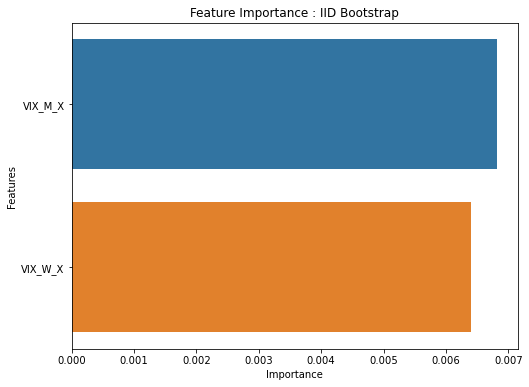

In [373]:
# Variable Importance
import seaborn as sns

rf_importances_values = rf_run.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_har_test.columns)
rf_importances_top = rf_importances.sort_values(ascending=False)[1:20]

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances_top, y=rf_importances_top.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance : IID Bootstrap")
plt.show()

In [374]:
y_test_original.shape

(275, 1)

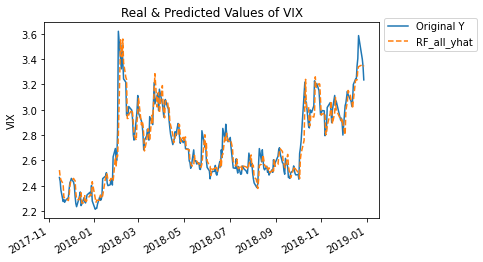

In [375]:
fig = plt.figure()
plt.plot(df_raw.index[::-1][:275][::-1], y_test_original, '-', label="Original Y")
plt.plot(df_raw.index[::-1][:275][::-1], rf_all_yhat, '--', label="RF_all_yhat")
plt.legend(bbox_to_anchor=(1, 1.05))
plt.ylabel("VIX")
plt.title("Real & Predicted Values of VIX")
fig.autofmt_xdate()
plt.show()

#### 2. Cross-validation : Time-series

In [376]:
# Grid Search CV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [4,6,8,10,12,14],
}

regr = TimeSeriesRandomForestRegressor(random_state=42,
    bootstrap='iid',
    # bootstrap_block_size=np.mean(optimal_block_length(npdata)[0]),
    n_jobs = -1)

grid_cv = GridSearchCV(regr, parameters, cv = tscv, n_jobs= -1)
grid_cv.fit(X_har_train, y_train)

print('Best Hyperparameters:', grid_cv.best_params_)
print('Best Score:', grid_cv.best_score_)

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 100}
Best Score: 0.665442086551909


In [377]:
# Training
rf_run = TimeSeriesRandomForestRegressor(random_state=42, bootstrap='iid', max_depth=grid_cv.best_params_['max_depth'], n_estimators=grid_cv.best_params_['n_estimators'])
rf_run.fit(X_har_train, y_train)

# Prediction
y_pred_test = rf_run.predict(X_har_test)

# Inverse transformation
rf_all_yhat = y_scaler.inverse_transform(y_pred_test.reshape(-1,1))

# Compute R2, MSE, MAE
print('Time-Series CV ALL R2 score - RF_iid: %.4f' % r2_score(y_test_original, rf_all_yhat))
print('Time-Series CV ALL MSE score - RF_iid: %.4f' % mean_squared_error(y_test_original, rf_all_yhat))
print('Time-Series CV ALL MAE score - RF_iid: %.4f' % mean_absolute_error(y_test_original, rf_all_yhat))

Time-Series CV ALL R2 score - RF_iid: 0.8924
Time-Series CV ALL MSE score - RF_iid: 0.0096
Time-Series CV ALL MAE score - RF_iid: 0.0655


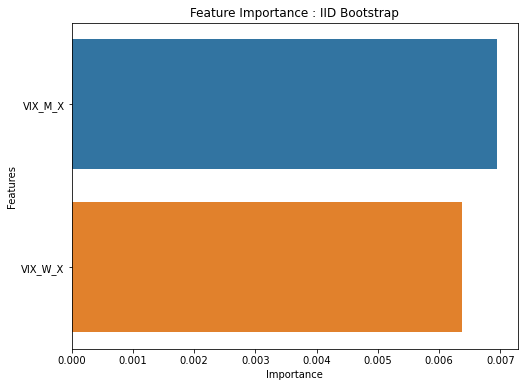

In [378]:
# Variable Importance
import seaborn as sns

rf_importances_values = rf_run.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_har_test.columns)
rf_importances_top = rf_importances.sort_values(ascending=False)[1:20]

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances_top, y=rf_importances_top.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance : IID Bootstrap")
plt.show()

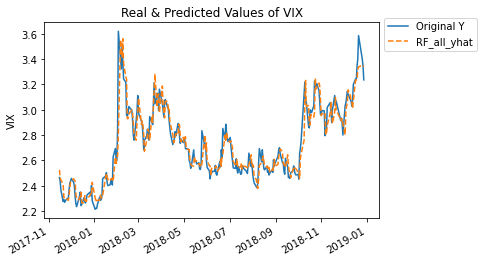

In [379]:
fig = plt.figure()
plt.plot(df_raw.index[::-1][:275][::-1], y_test_original, '-', label="Original Y")
plt.plot(df_raw.index[::-1][:275][::-1], rf_all_yhat, '--', label="RF_all_yhat")
plt.legend(bbox_to_anchor=(1, 1.05))
plt.ylabel("VIX")
plt.title("Real & Predicted Values of VIX")
fig.autofmt_xdate()
plt.show()

### ★ Random Forests - Stationary Bootstrap

#### 1. Cross-Validation : k-fold

In [380]:
# Grid Search CV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [4,6,8,10,12,14],
}

regr = TimeSeriesRandomForestRegressor(random_state=42,
    bootstrap='sb',
    # bootstrap_block_size=np.mean(optimal_block_length(npdata)[0]),
    n_jobs = -1)

grid_cv = GridSearchCV(regr, parameters, cv = kfcv, n_jobs= -1)
grid_cv.fit(X_har_train, y_train)

print('Best Hyperparameters:', grid_cv.best_params_)
print('Best Score:', grid_cv.best_score_)

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 100}
Best Score: 0.8223589555714795


In [381]:
# Training
rf_run = TimeSeriesRandomForestRegressor(random_state=42, bootstrap='sb', max_depth=grid_cv.best_params_['max_depth'], n_estimators=grid_cv.best_params_['n_estimators'])
rf_run.fit(X_har_train, y_train)

# Prediction
y_pred_test = rf_run.predict(X_har_test)

# Inverse transformation
rf_all_yhat = y_scaler.inverse_transform(y_pred_test.reshape(-1,1))

# Compute R2, MSE, MAE
print('K-fold ALL R2 score - RF_iid: %.4f' % r2_score(y_test_original, rf_all_yhat))
print('K-fold ALL MSE score - RF_iid: %.4f' % mean_squared_error(y_test_original, rf_all_yhat))
print('K-fold ALL MAE score - RF_iid: %.4f' % mean_absolute_error(y_test_original, rf_all_yhat))

K-fold ALL R2 score - RF_iid: 0.8883
K-fold ALL MSE score - RF_iid: 0.0099
K-fold ALL MAE score - RF_iid: 0.0660


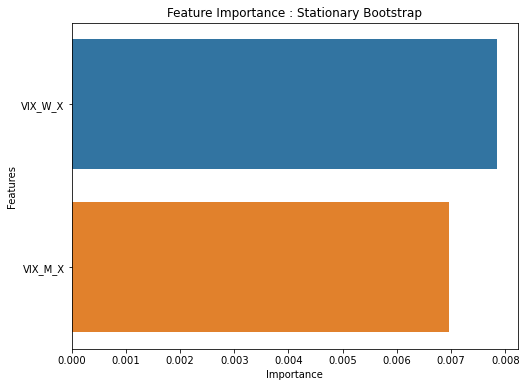

In [382]:
# Variable Importance
import seaborn as sns

rf_importances_values = rf_run.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_har_test.columns)
rf_importances_top = rf_importances.sort_values(ascending=False)[1:20]

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances_top, y=rf_importances_top.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance : Stationary Bootstrap")
plt.show()

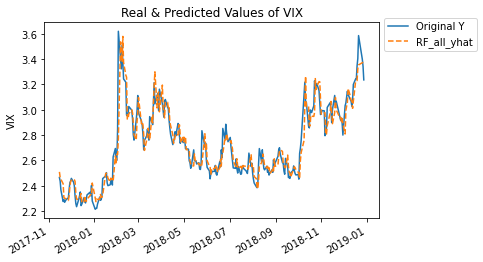

In [383]:
fig = plt.figure()
plt.plot(df_raw.index[::-1][:275][::-1], y_test_original, '-', label="Original Y")
plt.plot(df_raw.index[::-1][:275][::-1], rf_all_yhat, '--', label="RF_all_yhat")
plt.legend(bbox_to_anchor=(1, 1.05))
plt.ylabel("VIX")
plt.title("Real & Predicted Values of VIX")
fig.autofmt_xdate()
plt.show()

#### 2. Cross-Validation : Time-series

In [384]:
# Grid Search CV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [4,6,8,10,12,14],
}

regr = TimeSeriesRandomForestRegressor(random_state=42,
    bootstrap='sb',
    # bootstrap_block_size=np.mean(optimal_block_length(npdata)[0]),
    n_jobs = -1)

grid_cv = GridSearchCV(regr, parameters, cv = tscv, n_jobs= -1)
grid_cv.fit(X_har_train, y_train)

print('Best Hyperparameters:', grid_cv.best_params_)
print('Best Score:', grid_cv.best_score_)

Best Hyperparameters: {'max_depth': 4, 'n_estimators': 250}
Best Score: 0.6386788695176016


In [385]:
# Training
rf_run = TimeSeriesRandomForestRegressor(random_state=42, bootstrap='sb', max_depth=grid_cv.best_params_['max_depth'], n_estimators=grid_cv.best_params_['n_estimators'])
rf_run.fit(X_har_train, y_train)

# Prediction
y_pred_test = rf_run.predict(X_har_test)

# Inverse transformation
rf_all_yhat = y_scaler.inverse_transform(y_pred_test.reshape(-1,1))

# Compute R2, MSE, MAE
print('Time-Series CV ALL R2 score - RF_iid: %.4f' % r2_score(y_test_original, rf_all_yhat))
print('Time-Series CV ALL MSE score - RF_iid: %.4f' % mean_squared_error(y_test_original, rf_all_yhat))
print('Time-Series CV ALL MAE score - RF_iid: %.4f' % mean_absolute_error(y_test_original, rf_all_yhat))

Time-Series CV ALL R2 score - RF_iid: 0.8980
Time-Series CV ALL MSE score - RF_iid: 0.0091
Time-Series CV ALL MAE score - RF_iid: 0.0649


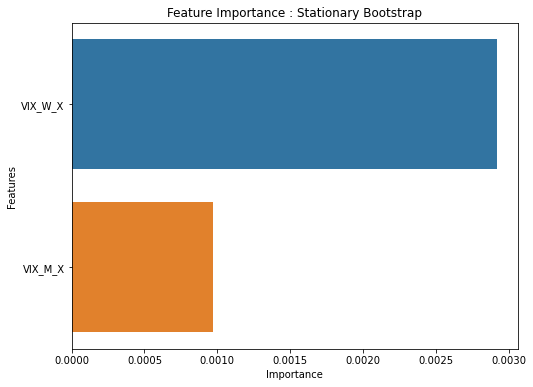

In [386]:
# Variable Importance
import seaborn as sns

rf_importances_values = rf_run.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_har_test.columns)
rf_importances_top = rf_importances.sort_values(ascending=False)[1:20]

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances_top, y=rf_importances_top.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance : Stationary Bootstrap")
plt.show()

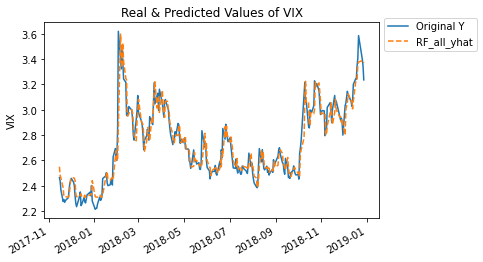

In [387]:
fig = plt.figure()
plt.plot(df_raw.index[::-1][:275][::-1], y_test_original, '-', label="Original Y")
plt.plot(df_raw.index[::-1][:275][::-1], rf_all_yhat, '--', label="RF_all_yhat")
plt.legend(bbox_to_anchor=(1, 1.05))
plt.ylabel("VIX")
plt.title("Real & Predicted Values of VIX")
fig.autofmt_xdate()
plt.show()

### ★ XGBOOST

In [388]:
from xgboost import XGBRegressor

In [412]:
# Grid Search CV

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [4,6,8,10,12,14],
}

regr = XGBRegressor(random_state=42,
    # bootstrap_block_size=np.mean(optimal_block_length(npdata)[0]),
    n_jobs = -1)

grid_cv = GridSearchCV(regr, parameters, cv = tscv, n_jobs= -1)
grid_cv.fit(X_har_train, y_train)

print('Best Hyperparameters:', grid_cv.best_params_)
print('Best Score:', grid_cv.best_score_)

Best Hyperparameters: {'max_depth': 4, 'n_estimators': 100}
Best Score: 0.6111076547803485


In [421]:
# Training
rf_run = XGBRegressor(random_state=42, max_depth=4, n_estimators=100)
rf_run.fit(X_har_train, y_train)

# Prediction
y_pred_test = rf_run.predict(X_har_test)

# Inverse transformation
rf_all_yhat = y_scaler.inverse_transform(y_pred_test.reshape(-1,1))

# Compute R2, MSE, MAE
print('K-fold ALL R2 score - RF_iid: %.4f' % r2_score(y_test_original, rf_all_yhat))
print('K-fold ALL MSE score - RF_iid: %.4f' % mean_squared_error(y_test_original, rf_all_yhat))
print('K-fold ALL MAE score - RF_iid: %.4f' % mean_absolute_error(y_test_original, rf_all_yhat))

K-fold ALL R2 score - RF_iid: 0.8761
K-fold ALL MSE score - RF_iid: 0.0110
K-fold ALL MAE score - RF_iid: 0.0688


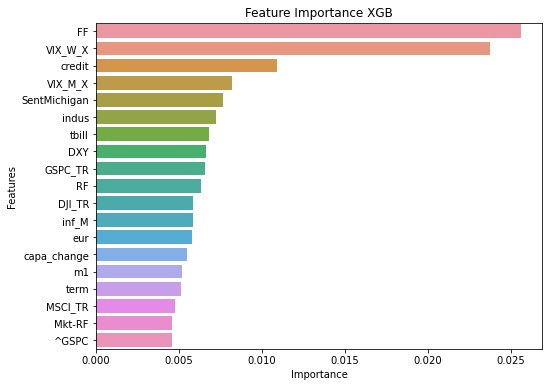

In [409]:
# Variable Importance
import seaborn as sns

rf_importances_values = rf_run.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = X_eco_test.columns)
rf_importances_top = rf_importances.sort_values(ascending=False)[1:20]

plt.figure(figsize=(8,6))
sns.barplot(x=rf_importances_top, y=rf_importances_top.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance XGB")
plt.show()

Text(0.5, 0, 'Permutation Importance')

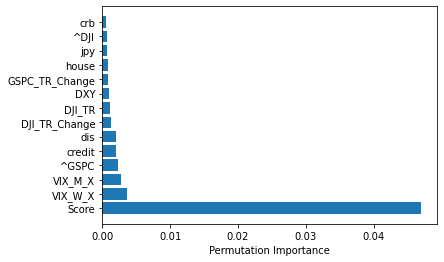

In [398]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf_run, X_all_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()[::-1][1:15]
plt.barh(X_all_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [299]:
# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [396]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_all_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [301]:
xgb.feature_importances_

array([0.79827964, 0.01838857, 0.00702427, 0.0023217 , 0.01375187,
       0.00401531, 0.00165384, 0.00225983, 0.00232501, 0.00162853,
       0.00319575, 0.00318747, 0.00264943, 0.00279379, 0.00203347,
       0.00425133, 0.00502548, 0.00800996, 0.00581298, 0.022825  ,
       0.00447089, 0.00246311, 0.00158842, 0.        , 0.00385777,
       0.01017254, 0.00256342, 0.00229558, 0.00397507, 0.00161361,
       0.00708376, 0.00305034, 0.00376339, 0.00250729, 0.00271903,
       0.0022403 , 0.00400364, 0.00417479, 0.00335604, 0.00294207,
       0.00501741, 0.00424811, 0.00268456, 0.00457068, 0.00320501],
      dtype=float32)

In [397]:
yhat_xgb = xgb.predict(X_all_test)
mean_squared_error(y_test, yhat_xgb)

0.003953664245880621

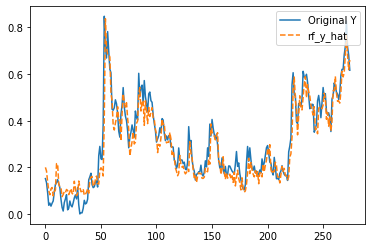

In [303]:
fig = plt.figure()
plt.plot(range(len(y_test)), y_test, '-', label="Original Y")
plt.plot(range(len(y_test)), yhat_xgb, '--', label="rf_y_hat")
plt.legend(loc='upper right')
plt.show()

Text(0.5, 0, 'Xgboost Feature Importance')

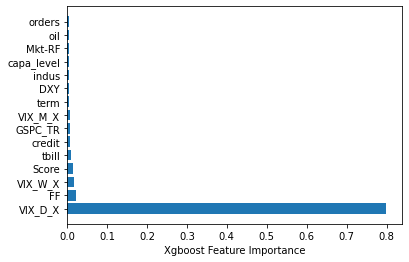

In [304]:
sorted_idx = xgb.feature_importances_.argsort()[::-1][0:15]
plt.barh(X_all_train.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

Text(0.5, 0, 'Permutation Importance')

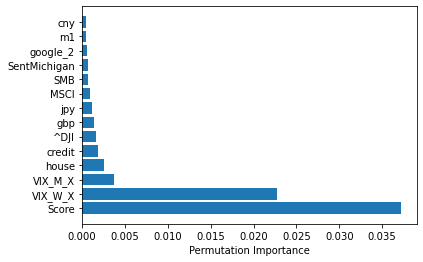

In [305]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(xgb, X_all_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()[::-1][1:15]
plt.barh(X_all_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")